# Assignment 2 - Random forests

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline

### Step 1. Reading the data

In [2]:
# Read the CSV file.
train_df = pd.read_csv("adult_train.csv")
test_df = pd.read_csv("adult_test.csv")

# Split into input part X and output part Y.
X_train = train_df.drop('target', axis=1)
X_test = test_df.drop('target', axis=1)
Y_train = train_df['target']
Y_test = test_df['target']


### Step 2: Encoding the features as numbers

In [3]:
#convert a DataFrame into a list of dictionaries, numerical values
dicts_for_X_train = X_train.to_dict('records')
dicts_for_X_test = X_test.to_dict('records')
# y is only a column, no need to convert

# For one-hot encoding 
# make a DictVectorizer and apply it to create a numerical representation 
# DictVectorizer: Transforms lists of feature-value mappings to vectors.
dv = DictVectorizer() 
X_train_encoded = dv.fit_transform(dicts_for_X_train)
X_test_encoded = dv.transform(dicts_for_X_test)

#Method for calculating mean
def cross_validation_calculator(cross_val_array):
    return round(np.mean(cross_val_array), 3)

# validation with classifier 
#Try decisiontree classifier
clf_tree = DecisionTreeClassifier() 
cross_val1 = cross_val_score(clf_tree, X_train_encoded, Y_train)
print("The validation score is: "  + str(cross_validation_calculator(cross_val1)))

#accuracy score?

The validation score is: 0.817


### Step 3. Combining the steps.

In [4]:
#Same process but automatically handle preprocessing with pipeline
pipeline = make_pipeline(
  DictVectorizer(),
  DecisionTreeClassifier())

# fit and predict to test the pipeline
pipeline.fit(dicts_for_X_train,Y_train) # pipelines need the directory format for x
#pipeline.predict(dicts_for_X_test)
#pipeline.score(dicts_for_X_test, Y_test)#new 
#print("The score is: "  + str(pipeline.score(dicts_for_X_test, Y_test)))

pipeline.steps[0][1]


DictVectorizer()

## Task 2 - Decision trees and random forests

Reproduce this experiment for this dataset, but now using scikit-learn's DecisionTreeClassifier 

Of course, you should use an evaluation metric for classification, not the mean squared error.

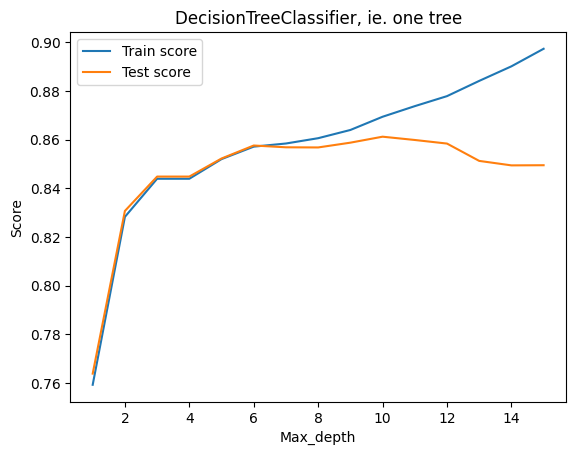

In [5]:
# needed range, lists
depths = list(range(1, 16, 1))
train_score = []
test_score = []

# Calculate scores for each max_depth
for d in depths:
    model = DecisionTreeClassifier(max_depth = d)
    model.fit(X_train_encoded, Y_train)
    train_score.append(model.score(X_train_encoded,Y_train))
    test_score.append(model.score(X_test_encoded,Y_test))

#Plot the scores
plt.plot(depths, train_score, label = "Train score")
plt.plot(depths, test_score, label = "Test score")
plt.xlabel("Max_depth")
plt.ylabel("Score")
plt.title("DecisionTreeClassifier, ie. one tree")
plt.legend()

Yes, the effect is similar. The overfittning still starts at around 6 levels of depth.  

### Replace the DecisionTreeClassifier with a RandomForestClassifier.

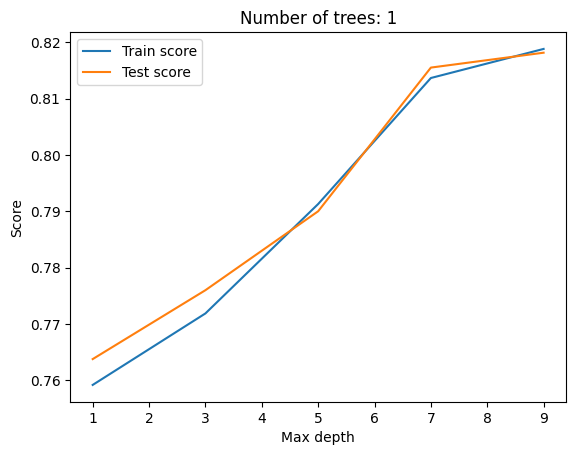

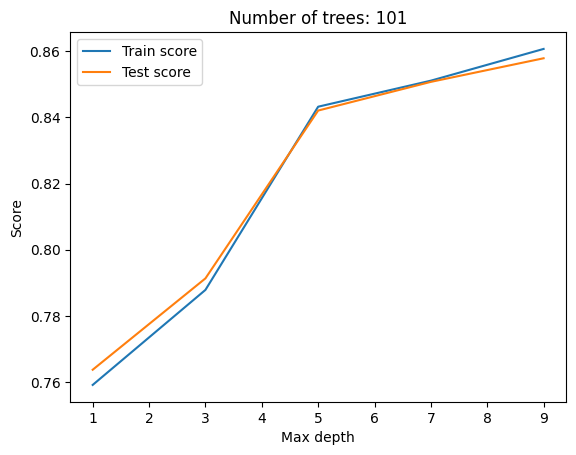

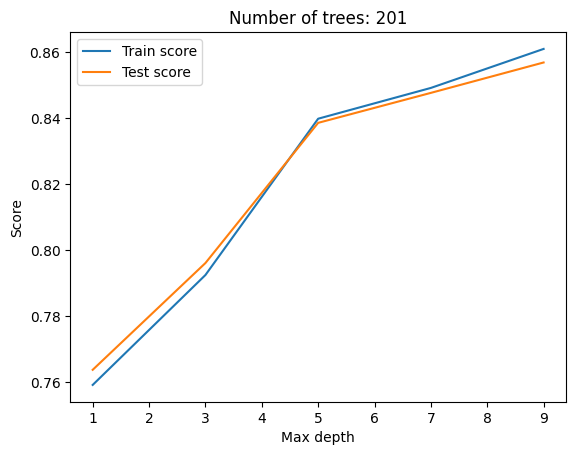

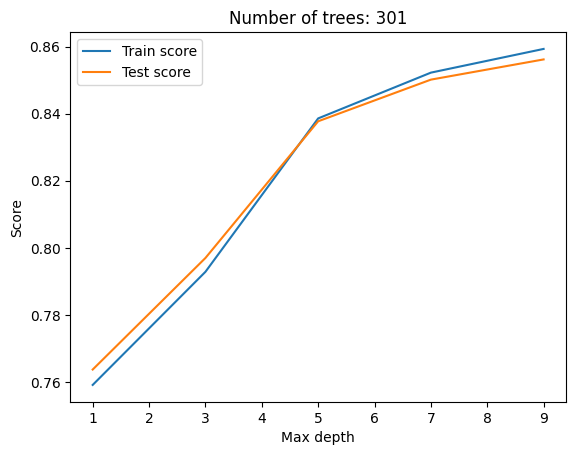

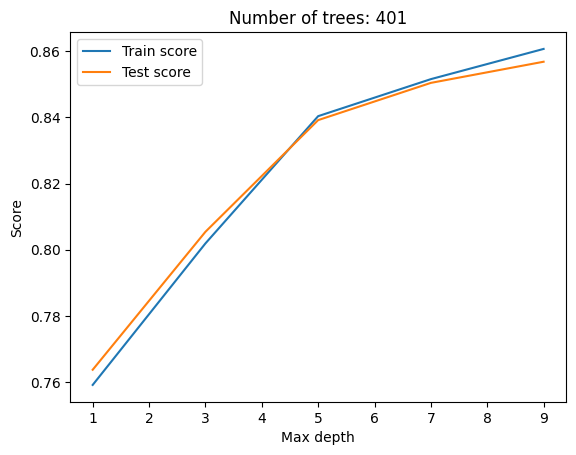

In [6]:
num_trees = list(range(1, 501, 100))

#create new loop for every tree 
for e in num_trees: 

    # needed range, lists
    max_depth = list(range(1,11,2)) # seemed like a good range
    train_score = []
    test_score = []

    # Calculate scores for each max depth
    for d in max_depth:
        model = RandomForestClassifier(n_estimators=e, max_depth = d, n_jobs=-1)
        model.fit(X_train_encoded, Y_train)
        train_score.append(model.score(X_train_encoded,Y_train))
        test_score.append(model.score(X_test_encoded,Y_test))

    #Plot the scores for all ensemble sizes
    plt.plot(max_depth, train_score, label = "Train score")
    plt.plot(max_depth, test_score, label = "Test score")
    plt.xlabel("Max depth")
    plt.ylabel("Score")
    plt.title('Number of trees: '+ str(e))
    plt.legend()
    plt.show()
    #plt.subplots(nrows=2, ncols=5)

What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?
ANS: Looking at the smaller values of max_depths for the two cases it can be observed that the test score for the ensemble model is slighlty higher than the training score, while they are more equal in the tree case. The reason for this IDK. For the rest of the ensemble model curve there is in contrast basically no sign of overfitting from the mean accuracy score, while there is a clear overfitting from max_depth = 6 and onwards in decisiontree case. WHY IS THERE LESS OVERFITTING FOR THE FOREST? --> probably because every three takes a subset of the data and hence is less prone to just memorise the data like the decision tree will do.

With finer steps for the max_depth, the curve gets instable?! 


What happens with the curve for random forests as the ensemble size grows?
ANS: the mean accuracy score increases to higher levels and faster (with lower max_depths). After 100 trees in the forest, most of the inprovements are already present.   

What happens with the best observed test set accuracy as the ensemble size grows?
ANS: Not that much. It is reached eariler and is more stable, but that is pretty much it.

What happens with the training time as the ensemble size grows?
ANS: bigger 


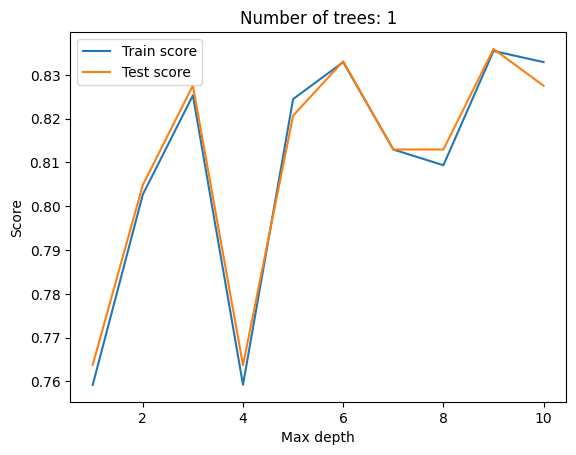

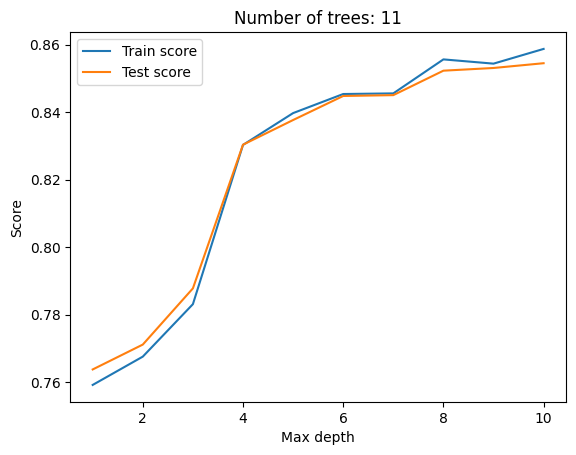

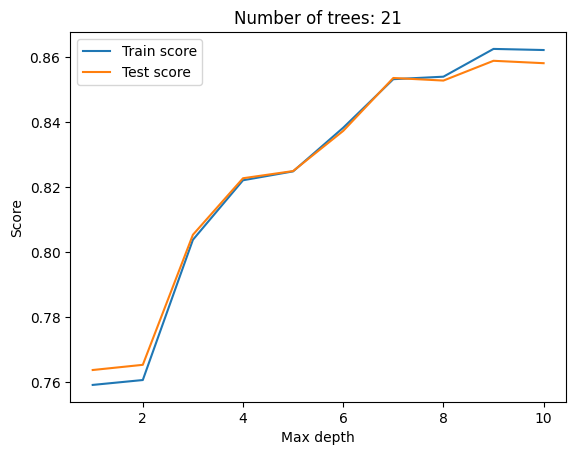

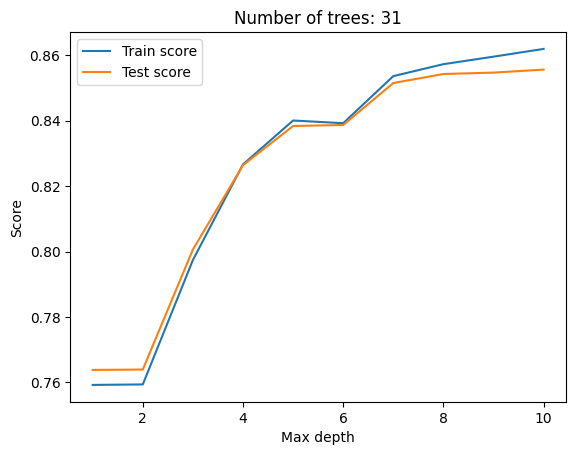

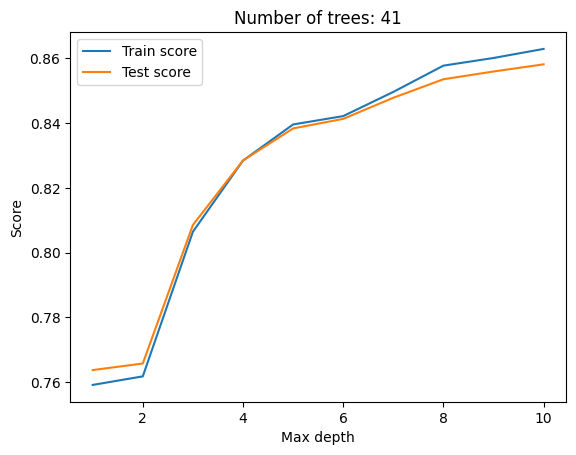

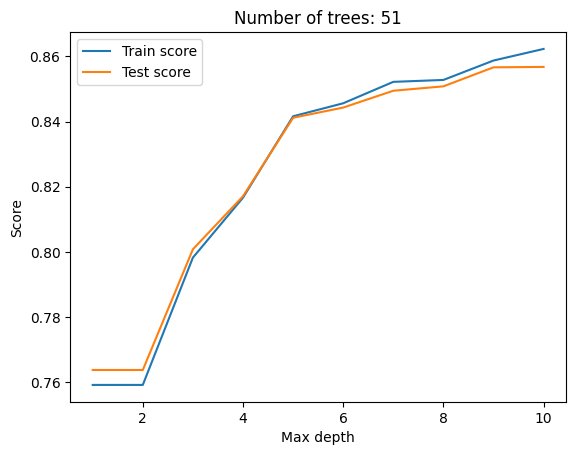

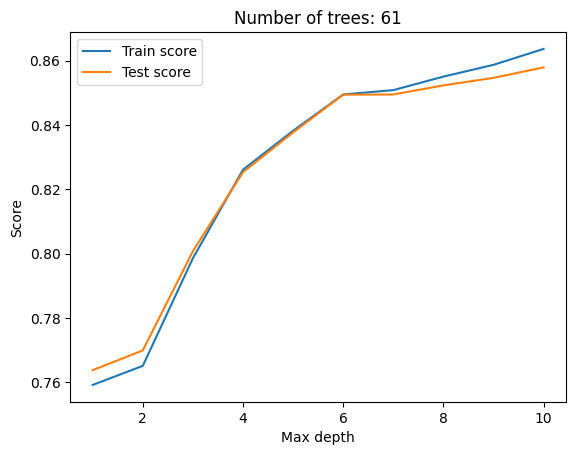

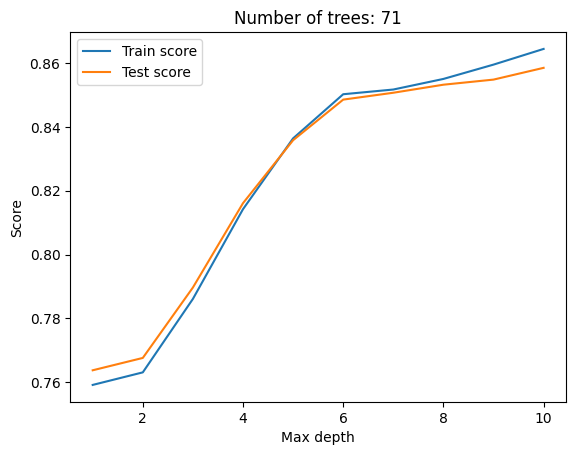

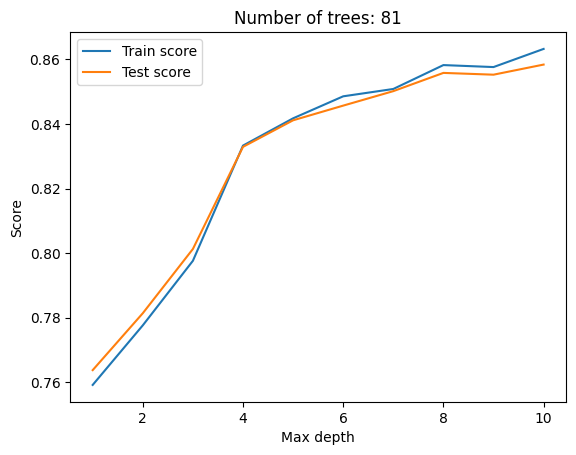

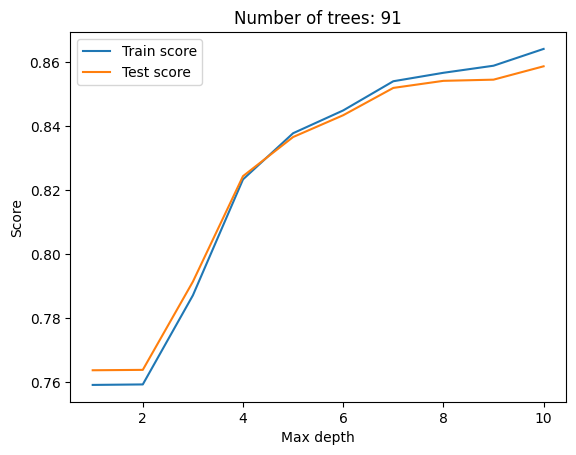

In [12]:
num_trees = list(range(1, 101, 10))

#create new loop for every tree 
for e in num_trees: 

    # needed range, lists
    max_depth = list(range(1,11,1)) # seemed like a good range
    train_score = []
    test_score = []

    # Calculate scores for each max depth
    for d in max_depth:
        model = RandomForestClassifier(n_estimators=e, max_depth = d, n_jobs=-1)
        model.fit(X_train_encoded, Y_train)
        train_score.append(model.score(X_train_encoded,Y_train))
        test_score.append(model.score(X_test_encoded,Y_test))

    #Plot the scores for all ensemble sizes
    plt.plot(max_depth, train_score, label = "Train score")
    plt.plot(max_depth, test_score, label = "Test score")
    plt.xlabel("Max depth")
    plt.ylabel("Score")
    plt.title('Number of trees: '+ str(e))
    plt.legend()
    plt.show()
    #plt.subplots(nrows=2, ncols=5)

In [11]:
print(len(list(range(1, 101, 10))))
print(len(list(range(1,11,1))))


10
10


 ## Task 3 - Feature importances in random forest classifiers
 
 

In [7]:
# print the importance scores old fashion
model = RandomForestClassifier()
model.fit(X_train_encoded, Y_train)
list1 =dv.feature_names_ #make these importance scores easier to understand
list2=model.feature_importances_

#merge features and their importances
res_list = dict (zip (list1, list2))
res_list
# Same length, but are they the same order?
sortedFeatures = sorted(res_list.items(), key=lambda x:x[1], reverse=True)
sortedFeatures
# again, really not sure about the ordering though... 

[('age', 0.22491911677383125),
 ('hours-per-week', 0.11562129905989828),
 ('capital-gain', 0.10987477551681893),
 ('marital-status=Married-civ-spouse', 0.07035194509843132),
 ('education-num', 0.0637988015760071),
 ('relationship=Husband', 0.04365518578161952),
 ('capital-loss', 0.034896079043556454),
 ('marital-status=Never-married', 0.026630848425251725),
 ('occupation=Exec-managerial', 0.019636324497305575),
 ('occupation=Prof-specialty', 0.015990006688384035),
 ('education=Bachelors', 0.012545328097438345),
 ('workclass=Private', 0.011428677173798214),
 ('relationship=Not-in-family', 0.010904811653656024),
 ('relationship=Wife', 0.010473667480202313),
 ('sex=Male', 0.009778385651367516),
 ('workclass=Self-emp-not-inc', 0.009148811614695296),
 ('sex=Female', 0.008981543620826473),
 ('education=Masters', 0.00876985131437947),
 ('education=HS-grad', 0.008752942955056969),
 ('occupation=Other-service', 0.007785626049851487),
 ('relationship=Own-child', 0.007563893986090945),
 ('occupat

In [8]:
#print the importance scores w/ a pipeline 
pipe = make_pipeline(DictVectorizer(), RandomForestClassifier())
pipe.fit(dicts_for_X_train,Y_train)
#pipe.steps[1] # to accesses the classifier that holds features
f_values =pipe.steps[1][1].feature_importances_
f_names=pipe.steps[0][1].feature_names_
#merge lists
res_list = dict (zip (f_names, f_values))
sortedFeatures = sorted(res_list.items(), key=lambda x:x[1], reverse=True)
sortedFeatures

[('age', 0.2248634501949242),
 ('hours-per-week', 0.11328068481104375),
 ('capital-gain', 0.10782909298083393),
 ('marital-status=Married-civ-spouse', 0.07464404519940263),
 ('education-num', 0.06844782555033814),
 ('relationship=Husband', 0.04004341998019565),
 ('capital-loss', 0.036199789719297056),
 ('marital-status=Never-married', 0.02419626082260153),
 ('occupation=Exec-managerial', 0.019910164019460653),
 ('occupation=Prof-specialty', 0.014373613948882086),
 ('education=Bachelors', 0.012053668421326184),
 ('relationship=Not-in-family', 0.011766612635729576),
 ('workclass=Private', 0.011589522632047449),
 ('relationship=Own-child', 0.0113327901885882),
 ('workclass=Self-emp-not-inc', 0.00925516471509362),
 ('relationship=Wife', 0.009214229592684973),
 ('sex=Male', 0.008902558186190426),
 ('sex=Female', 0.008828920076727398),
 ('education=Masters', 0.008653817941461221),
 ('education=HS-grad', 0.007777081932372011),
 ('occupation=Sales', 0.007393303870002904),
 ('workclass=Self-emp

1. Inspect the first few of these features, and try to reason about why you got this result.
Top five are: 
age': 0.22461912228964323,
 'capital-gain': 0.10568091530488884,
 'capital-loss': 0.033942303938799316,
 'education-num': 0.06399264857875338,
 'education=10th': 0.001569395702664999,

Age seems very reasonable to correlate with higher salaries, as individuals advance in their career and get higher salaries. Similar, we think it is reasonable that captail gain and loss sounds like a feature that is good for discriminating between the two lables as capital movement should be affected by salary levels. The more money you earn the more you e.g. invest and the more capital gains you can make. (yes we are a bit unsure about the exact definition of the measure). Lastly, your educational level (as the number of years you studied) can fairly be assumed to correlate with with income levels.          

2. For your report, please also mention an alternative way to compute some sort of importance score of individual features. (You don't need to implement it.) Here, you can either use your common sense, or optionally read the discussion by Parr et al. (2018) that gives some criticism of decision tree-based feature importance scores and discusses some alternatives.

Common sense approach: 
- Split on the binary classes, count the freq of each feature on each class and determine when the proportion of a feature is high for one and low for the other or vice versa. That should indicate that given feature is pretty good for discriminating between the classes. 









<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fb10e4e7-3851-48d2-9a1d-280535dc70fe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>